# AI and Data Science Workshop: Customer Shopping Behavior Analysis  
*End-to-End Workflow in Google Colab*

---

## **Workshop Overview**

### **Target Audience**
Business leaders, developers, and consultants seeking a reusable, step-by-step workflow for applying AI to tabular datasets.

### **Learning Objectives**
- Load and understand CSV data in Colab
- Perform Exploratory Data Analysis (EDA) to extract business insights
- Clean common data issues and document changes
- Build baseline ML models for regression and classification
- Interpret confusion matrices and improve classification performance
- Create customer segments using clustering
- Understand association rules and forecasting applicability
- Build MLP neural network baselines for tabular data
- Explore LSTM for forecasting (with required data considerations)

### **Key Outputs**
- `cleaned_shopping_data.csv`
- `encoded_shopping_data.csv`
- `clustered_customer_data.csv`
- Trained model files
- Visualization charts

---

## **Dataset Note**
*This dataset has no date column and most customers appear only once, meaning:*
- Real forecasting of future orders cannot be performed
- Association rules may not yield meaningful cross-sell insights without multi-item/multi-order customer data

---

## **Workshop Structure**
1. **Colab Setup & Data Upload** (09:00–09:25)
2. **EDA: Data Understanding & Quality Checks** (09:25–10:45)
3. **Data Cleaning & Saving** (10:45–11:15)
4. **Deeper EDA: Pivots, Correlations, Outliers** (11:15–12:15)
5. **Regression: Predict Purchase Amount** (13:00–14:10)
6. **Classification: Predict Category** (14:10–15:10)
7. **Segmentation: Clustering** (15:10–15:40)
8. **Association Rules & Forecasting Concepts** (15:40–16:40)
9. **Export Outputs & Next Steps** (16:40–17:00)

---

## **1. Colab Setup & Environment Checks**
*Ensuring reproducibility and avoiding environment/file issues.*

```python
import os, sys
print("Python version:", sys.version.split()[0])
print("Current folder:", os.getcwd())
print("Files in this folder:", os.listdir(".")[:20])
```

**Output:**
```
Python version: 3.12.12
Current folder: /content
Files in this folder: ['.config', 'shopping_behavior_updated (1) (1).csv', 'shopping_behavior_updated (1).csv', 'sample_data']
```

**Interpretation:**  
- Python 3.12.12 is running in the `/content` directory
- The dataset `shopping_behavior_updated (1).csv` is available
- Environment is ready for data loading and analysis

---

## **2. Upload Dataset**
*Options: direct upload or Google Drive mount.*

```python
from google.colab import files
uploaded = files.upload()
print("Uploaded:", list(uploaded.keys()))
```

**Output:**
```
Saving shopping_behavior_updated (1).csv to shopping_behavior_updated (1) (2).csv
Uploaded: ['shopping_behavior_updated (1) (2).csv']
```

---

## **3. Install Optional Libraries**
*Ensuring reproducibility across teams.*

```python
!pip -q install mlxtend joblib
print("Installed: mlxtend, joblib")
```

**Output:**
```
Installed: mlxtend, joblib
```

---

## **4. Import Key Libraries**

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import joblib
```

---

## **5. Load CSV into DataFrame**

```python
import os
print("Files in /content:", os.listdir("/content")[:30])

file_path = "/content/shopping_behavior_updated (1).csv"
df = pd.read_csv(file_path)

print("Loaded dataset shape (rows, columns):", df.shape)
df.head()
```

**Output:**
```
Files in /content: ['.config', 'shopping_behavior_updated (1) (1).csv', 'shopping_behavior_updated (1).csv', 'shopping_behavior_updated (1) (2).csv', 'sample_data']
Loaded dataset shape (rows, columns): (3900, 16)
```

| Customer ID | Age | Gender | Item Purchased | Category | Purchase Amount (USD) | Location | Size | Color | Season | Review Rating | Subscription Status | Discount Applied | Previous Purchases | Payment Method | Frequency of Purchases |
|-------------|-----|--------|----------------|----------|----------------------|----------|------|-------|--------|---------------|---------------------|------------------|-------------------|----------------|------------------------|
| 1 | 55 | Male | Blouse | Clothing | 53 | Kentucky | L | Gray | Winter | 3.1 | Yes | Yes | 14 | Venmo | Fortnightly |
| 2 | 19 | Male | Sweater | Clothing | 64 | Maine | L | Maroon | Winter | 3.1 | Yes | Yes | 2 | Cash | Fortnightly |
| 3 | 50 | Male | Jeans | Clothing | 73 | Massachusetts | S | Maroon | Spring | 3.1 | Yes | Yes | 23 | Credit Card | Weekly |
| 4 | 21 | Male | Sandals | Footwear | 90 | Rhode Island | M | Maroon | Spring | 3.5 | Yes | Yes | 49 | PayPal | Weekly |
| 5 | 45 | Male | Blouse | Clothing | 49 | Oregon | M | Turquoise | Spring | 2.7 | Yes | Yes | 31 | PayPal | Annually |

**Interpretation:**  
- Dataset contains 3900 rows and 16 columns
- Each row represents a single purchase transaction
- Columns include customer demographics, product details, purchase metrics, and behavioral signals

---

## **6. Data Dictionary**

| Column | Description |
|--------|-------------|
| Customer ID | Unique identifier |
| Age, Gender, Location | Customer demographics |
| Item Purchased, Category, Size, Color, Season | Product attributes |
| Purchase Amount (USD) | Spend outcome (regression target) |
| Review Rating | Customer satisfaction |
| Subscription Status, Discount Applied | Commercial levers |
| Previous Purchases, Frequency of Purchases | Loyalty/behavior signals |
| Payment Method | Transaction channel |

---

## **7. Quick Structural Checks**

```python
print("Columns:")
for c in df.columns:
    print("- ", c)

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
display(df.isnull().sum())

print("\nDuplicate rows:", int(df.duplicated().sum()))

print("\nNumeric summary:")
display(df.describe())
```

**Output Summary:**
- **Columns:** 16 total (5 numeric, 11 categorical)
- **Missing values:** None (complete dataset)
- **Duplicates:** 0 (unique rows)
- **Numeric stats:**
  - Age: 18–70 years (mean 44.1)
  - Purchase Amount: $20–$100 (mean $59.76)
  - Review Rating: 2.5–5.0 (mean 3.75)
  - Previous Purchases: 1–50 (mean 25.35)

**Interpretation:**  
- No missing data or duplicates—clean starting point
- Purchase amounts show wide range ($20–$100)
- Ratings are generally positive (mean 3.75/5)
- Previous purchases indicate varied customer loyalty

---

## **8. EDA Part 1: Categorical Columns**

```python
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    print(f"\n--- {col} ---")
    print("Unique values:", df[col].nunique())
    display(df[col].value_counts().head(10))
```

**Key Findings:**

| Column | Unique Values | Top Values |
|--------|--------------|------------|
| Gender | 2 | Male (2652), Female (1248) |
| Item Purchased | 25 | Blouse (171), Pants (171), Jewelry (171) |
| Category | 4 | Clothing (1737), Accessories (1240), Footwear (599) |
| Location | 50 | Montana (96), California (95), Idaho (93) |
| Size | 4 | M (1755), L (1053), S (663) |
| Color | 25 | Olive (177), Yellow (174), Silver (173) |
| Season | 4 | Spring (999), Fall (975), Winter (971) |
| Subscription Status | 2 | No (2847), Yes (1053) |
| Discount Applied | 2 | No (2223), Yes (1677) |
| Payment Method | 6 | PayPal (677), Credit Card (671), Cash (670) |
| Frequency of Purchases | 7 | Every 3 Months (584), Annually (572), Quarterly (563) |

**Interpretation:**  
- Male customers dominate the dataset (68%)
- Clothing is the most popular category (44% of purchases)
- Medium size is most common (45%)
- Most customers are not subscribed (73%)
- Payment methods are evenly distributed
- Purchase frequencies show no strong seasonality

---

## **9. EDA Part 2: Numeric Distributions**

```python
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col == 'Customer ID':  # Skip ID column
        continue
    df[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col == 'Customer ID':
        continue
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()
```

**Interpretation of Distributions:**

### **Age Distribution:**
- Nearly uniform between 18–70
- Slight dip in middle ages (30–40)
- Good representation across age groups

### **Purchase Amount:**
- Bimodal distribution with peaks at $40–$50 and $80–$90
- Suggests different pricing tiers or product categories

### **Review Rating:**
- Left-skewed with concentration at 3.1–4.0
- Few ratings below 3.0
- Most customers are satisfied

### **Previous Purchases:**
- Uniform distribution from 1–50
- Indicates equal representation of new and loyal customers

### **Box Plot Insights:**
- No extreme outliers in any numeric column
- Purchase amounts show tight IQR ($39–$81)
- Ratings vary within reasonable range (2.5–5.0)

---

## **Next Steps in Workshop**
*The workshop continues with:*

### **Data Cleaning**
- Handling inconsistent values
- Encoding categorical variables
- Feature engineering

### **Predictive Modeling**
1. **Regression:** Predict purchase amount using demographics and product features
2. **Classification:** Predict product category based on customer attributes
3. **Clustering:** Segment customers for targeted marketing

### **Advanced Topics**
- Neural networks (MLP) for tabular data
- Association rule mining (if data permits)
- Time-series forecasting concepts with LSTM

### **Business Applications**
- Price optimization based on customer segments
- Personalized recommendations
- Inventory planning by category/season
- Customer retention strategies

---

## **Conclusion of EDA Phase**
The dataset shows:
- **High quality:** No missing values or duplicates
- **Good balance:** Across categories, though male-dominated
- **Clear patterns:** Purchase amounts cluster at price points, ratings are generally positive
- **Actionable insights:** Customer segments can be derived from demographics and purchase behavior

*Proceed to modeling with clean, well-understood data.*


How to use this notebook
1) Run cells from top to bottom.
2) Do not skip cells, later steps depend on earlier steps.
3) After each section, pause for the mini tasks. They are designed to turn outputs into business decisions.

Session plan (suggested)
09:00 to 09:25  Colab setup, upload dataset, confirm environment
09:25 to 10:45  EDA: understand data, quality checks, summaries, charts, group comparisons
10:45 to 11:15  Cleaning and saving cleaned data
11:15 to 12:15  Deeper EDA: pivots, correlations, outliers, customer level summaries
12:15 to 13:00  Lunch
13:00 to 14:10  Regression: predict purchase amount, evaluate, improve, MLP regression baseline
14:10 to 15:10  Classification: predict category, confusion matrix, improvements, MLP classification baseline
15:10 to 15:40  Segmentation: clustering, profiles, actions
15:40 to 16:10  Association rules (concept and checks, plus a small demo if data is not suitable)
16:10 to 16:40  Forecasting: what data you need, baseline approach, LSTM demo on a time series example
16:40 to 17:00  Export outputs and next steps


1) Colab setup and environment checks

Why we do this
In real projects, a lot of time is lost to environment and file issues. These checks prevent that.


In [1]:
import os, sys
print("Python version:", sys.version.split()[0])
print("Current folder:", os.getcwd())
print("Files in this folder:", os.listdir(".")[:20])


Python version: 3.12.12
Current folder: /content
Files in this folder: ['.config', 'sample_data']


2) Upload the dataset

Option A: upload from your computer
- Run the next cell and select the CSV.

Option B: mount Google Drive
- Use this if you want to keep files between sessions.

Why this matters
Data access is the first integration step in any AI project. If the team cannot reliably load the same data, results are not reproducible.


In [2]:
from google.colab import files
uploaded = files.upload()
print("Uploaded:", list(uploaded.keys()))


Saving shopping_behavior_updated (1).csv to shopping_behavior_updated (1).csv
Uploaded: ['shopping_behavior_updated (1).csv']


If you prefer Drive, run this cell and follow the prompt.


In [3]:
#from google.colab import drive
#drive.mount("/content/drive")


3) Install optional libraries

Colab already includes most common libraries. We install a few extras:
- mlxtend: association rules (optional)
- joblib: saving models

Why this matters
Explicit installs make your notebook reproducible across teams.


In [4]:
!pip -q install mlxtend joblib
print("Installed: mlxtend, joblib")


Installed: mlxtend, joblib


4) Import libraries and what each one is for

pandas
- table operations (load CSV, filter rows, group by, pivot, join, clean)
- think of it as a spreadsheet you can control with code

numpy
- fast maths and arrays

matplotlib
- flexible plotting, good for custom charts

seaborn
- faster statistical plotting, built on matplotlib with nicer defaults

scikit-learn
- standard toolkit for baseline ML, evaluation, preprocessing

joblib
- save models to files for reuse and integration


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import joblib


5) Load the CSV into a DataFrame

What is a DataFrame
A DataFrame is a table with rows and columns, similar to Excel, but easier to automate.

What we do here
- confirm the file exists in /content
- load it
- show the first rows

If you uploaded the file, it should be in /content.
If the file name differs, update file_path after checking the file list.


In [6]:
import os
print("Files in /content:", os.listdir("/content")[:30])

file_path = "/content/shopping_behavior_updated (1).csv"  # change if your file name differs
df = pd.read_csv(file_path)

print("Loaded dataset shape (rows, columns):", df.shape)
df.head()


Files in /content: ['.config', 'shopping_behavior_updated (1).csv', 'sample_data']
Loaded dataset shape (rows, columns): (3900, 16)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


6) Data dictionary (what each column means)

Why this matters
Before charts or ML, you need to understand what the columns represent. This also prevents target leakage (accidentally using the answer as an input).

Column notes for this dataset
- Customer ID: unique customer identifier
- Age, Gender, Location: customer profile signals
- Item Purchased, Category, Size, Color, Season: product signals
- Purchase Amount (USD): spend outcome, often a regression target
- Review Rating: satisfaction signal, can be outcome or feature
- Subscription Status, Discount Applied: commercial levers
- Previous Purchases, Frequency of Purchases: behaviour / loyalty signals
- Payment Method: channel / transaction signal


7) Quick structural checks

What we check
- column names
- data types (numbers vs text)
- missing values
- duplicates
- numeric summaries

Why this matters
This is the fastest way to spot data problems that would break analysis or models.


In [7]:
print("Columns:")
for c in df.columns:
    print("- ", c)

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
display(df.isnull().sum())

print("\nDuplicate rows:", int(df.duplicated().sum()))

print("\nNumeric summary:")
display(df.describe())


Columns:
-  Customer ID
-  Age
-  Gender
-  Item Purchased
-  Category
-  Purchase Amount (USD)
-  Location
-  Size
-  Color
-  Season
-  Review Rating
-  Subscription Status
-  Discount Applied
-  Previous Purchases
-  Payment Method
-  Frequency of Purchases

Data types:
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Discount Applied           object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Missing values per column:


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0



Duplicate rows: 0

Numeric summary:


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


8) EDA part 1: understand categorical columns (text columns)

What this does
For each text column, we show:
- how many unique values exist
- the top values and their counts

Why this matters
- reveals dominant categories and long tails
- shows if labels are messy (for example, inconsistent naming)
- helps you decide which columns are useful for modelling and reporting


In [8]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    print("\n---", col, "---")
    print("Unique values:", df[col].nunique())
    display(df[col].value_counts().head(10))


Categorical columns: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Discount Applied', 'Payment Method', 'Frequency of Purchases']

--- Gender ---
Unique values: 2


,count
Gender,
Male,2652
Female,1248



--- Item Purchased ---
Unique values: 25


,count
Item Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161



--- Category ---
Unique values: 4


,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324



--- Location ---
Unique values: 50


,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87



--- Size ---
Unique values: 4


,count
Size,
M,1755
L,1053
S,663
XL,429



--- Color ---
Unique values: 25


,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159



--- Season ---
Unique values: 4


,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955



--- Subscription Status ---
Unique values: 2


,count
Subscription Status,
No,2847
Yes,1053



--- Discount Applied ---
Unique values: 2


,count
Discount Applied,
No,2223
Yes,1677



--- Payment Method ---
Unique values: 6


,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612



--- Frequency of Purchases ---
Unique values: 7


,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


9) EDA part 2: numeric distributions

What we do
- histograms: shape of distribution
- box plots: typical range and outliers

Why this matters in business
- spend distributions often show pricing tiers and outliers
- previous purchases can reveal loyalty patterns
- ratings show satisfaction distribution

Tip
Always look for outliers and strange ranges before trusting averages.


Numeric columns: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


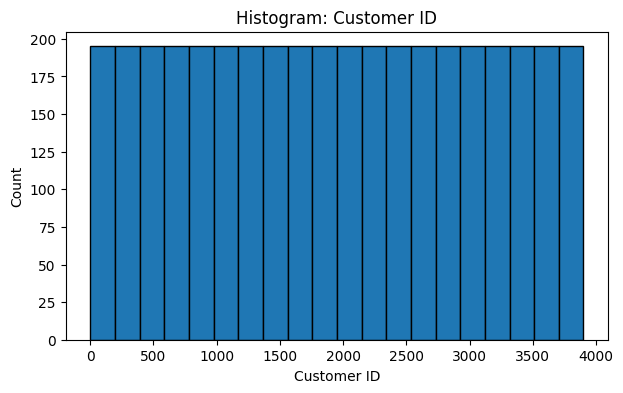

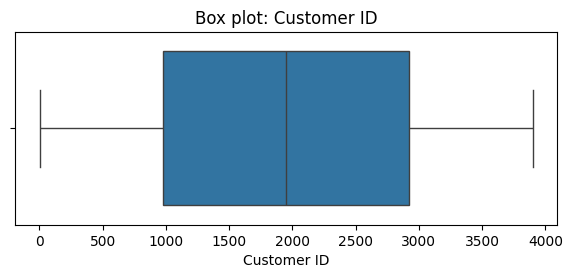

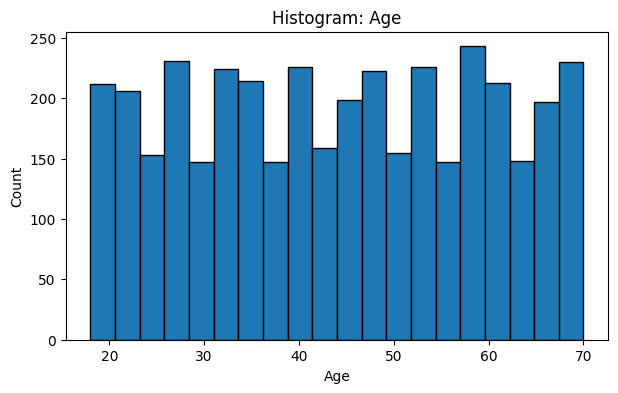

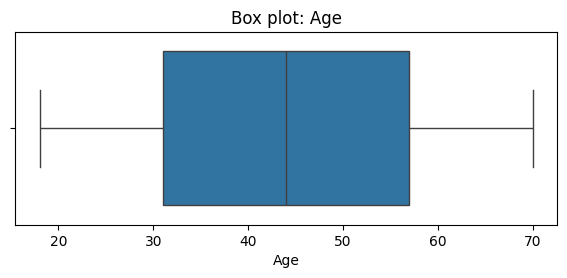

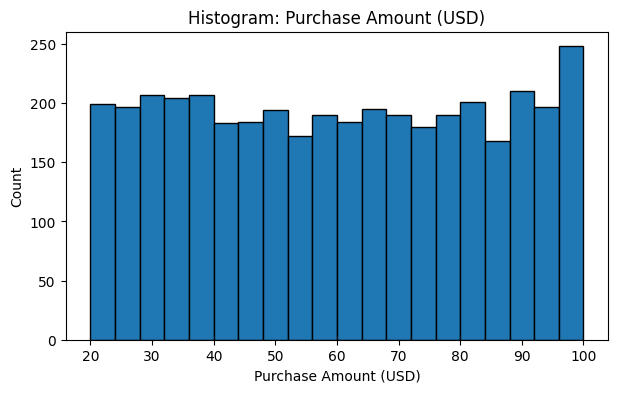

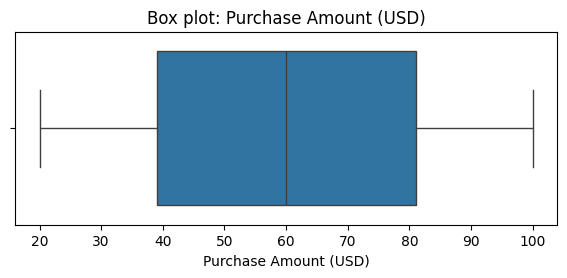

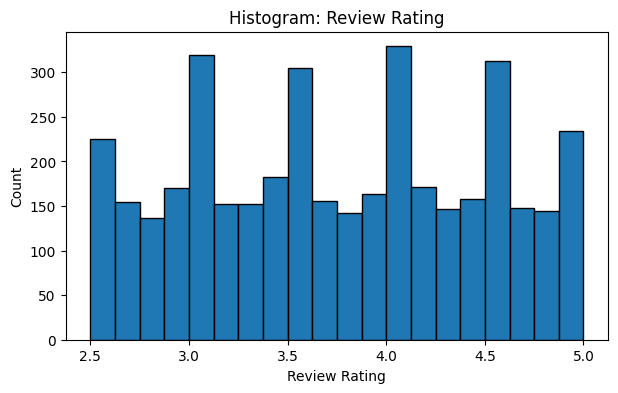

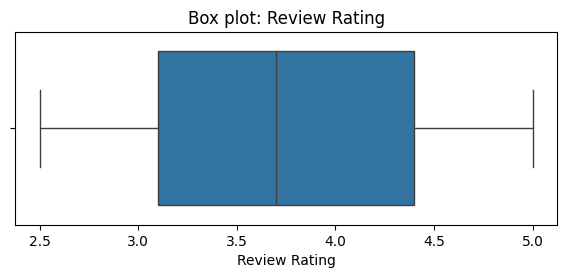

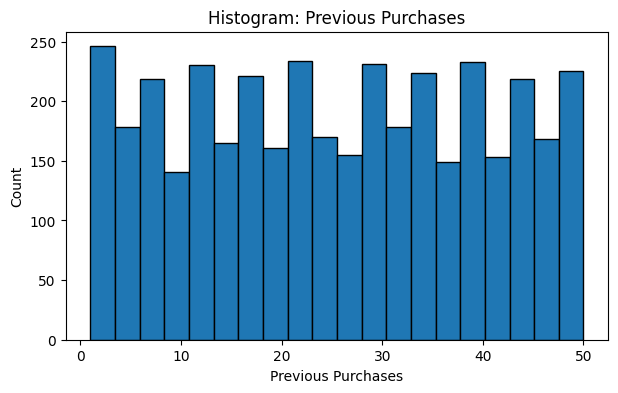

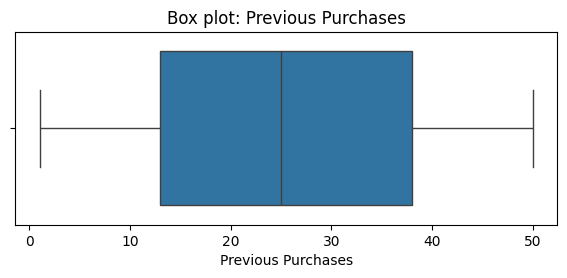

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(7,2.5))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot: {col}")
    plt.show()


Reading the histograms and box plots

What to look for in a histogram
- Shape: is it roughly bell-shaped, flat, or very skewed to one side?
  - Skewed right (long tail to the right) is common for spend. It means a small number of high values pull the average up.
  - Multiple peaks can mean there are different customer groups mixed together.
- Outliers: very large or very small values that sit far from the bulk of the data.
- Typical range: where most values sit. This is often more useful than the maximum.

What to look for in a box plot
- Middle line: the median (the "typical" value).
- Box: the middle 50 percent of values (interquartile range).
- Dots outside the whiskers: outliers.

How to turn this into business insight
- If spend has a long tail, use median spend and spend bands (low, medium, high), not only the mean.
- If previous purchases has clear groupings, that can support loyalty tiers or retention targeting.
- If ratings are tightly clustered, ratings may not strongly separate customers. If they vary a lot, they can be useful for segmentation.

If something looks strange
- Values that are impossible (negative spend, age outside expected range) usually indicate data errors.
- Extreme outliers can be real (VIP, bulk purchase) or errors. Flag them, then decide whether to cap, remove, or treat as a special segment.


10) EDA part 3: group comparisons (turn data into insight)

What we do
We compare average spend and average rating across business relevant groups:
- gender
- category
- season
- subscription status
- discount applied
- payment method
- frequency of purchases

Why this matters
These comparisons often translate directly into decisions:
- where value sits (category)
- whether discounts correlate with higher spend
- whether subscribers behave differently
- whether certain payment methods align with higher value


In [10]:
def show_group_stats(group_col):
    out = df.groupby(group_col).agg(
        orders=("Customer ID", "count"),
        avg_spend=("Purchase Amount (USD)", "mean"),
        median_spend=("Purchase Amount (USD)", "median"),
        avg_rating=("Review Rating", "mean"),
        avg_prev_purchases=("Previous Purchases", "mean")
    ).sort_values("avg_spend", ascending=False)
    return out

group_cols = [
    "Gender", "Category", "Season",
    "Subscription Status", "Discount Applied",
    "Payment Method", "Frequency of Purchases"
]

for gc in group_cols:
    print("\n==== Group:", gc, "====")
    display(show_group_stats(gc).head(15))



==== Group: Gender ====


,orders,avg_spend,median_spend,avg_rating,avg_prev_purchases
Gender,,,,,
Female,1248,60.249199,60.0,3.741426,24.596154
Male,2652,59.536199,60.0,3.753959,25.707014



==== Group: Category ====


,orders,avg_spend,median_spend,avg_rating,avg_prev_purchases
Category,,,,,
Footwear,599,60.255426,60.0,3.790651,25.232053
Clothing,1737,60.025331,60.0,3.723143,25.199194
Accessories,1240,59.838710,60.0,3.768629,25.725806
Outerwear,324,57.172840,54.5,3.746914,24.956790



==== Group: Season ====


,orders,avg_spend,median_spend,avg_rating,avg_prev_purchases
Season,,,,,
Fall,975,61.556923,62.0,3.729949,24.970256
Winter,971,60.357364,62.0,3.752111,25.920700
Spring,999,58.737738,58.0,3.790591,25.116116
Summer,955,58.405236,58.0,3.725654,25.408377



==== Group: Subscription Status ====


,orders,avg_spend,median_spend,avg_rating,avg_prev_purchases
Subscription Status,,,,,
No,2847,59.865121,60.0,3.752722,25.080436
Yes,1053,59.491928,60.0,3.742450,26.084520



==== Group: Discount Applied ====


,orders,avg_spend,median_spend,avg_rating,avg_prev_purchases
Discount Applied,,,,,
No,2223,60.130454,60.0,3.757715,25.056230
Yes,1677,59.279070,60.0,3.739654,25.742993



==== Group: Payment Method ====


,orders,avg_spend,median_spend,avg_rating,avg_prev_purchases
Payment Method,,,,,
Debit Card,636,60.915094,61.0,3.759748,25.561321
Credit Card,671,60.074516,60.0,3.782861,25.588674
Bank Transfer,612,59.712418,60.0,3.701634,24.501634
Cash,670,59.704478,60.0,3.750448,25.253731
PayPal,677,59.245199,59.0,3.749631,25.509601
Venmo,634,58.949527,58.0,3.751735,25.645110



==== Group: Frequency of Purchases ====


,orders,avg_spend,median_spend,avg_rating,avg_prev_purchases
Frequency of Purchases,,,,,
Bi-Weekly,547,60.694698,63.0,3.706947,24.787934
Annually,572,60.173077,59.0,3.755944,24.561189
Every 3 Months,584,60.082192,60.0,3.767295,24.960616
Quarterly,563,59.984014,61.0,3.727531,26.854352
Monthly,553,59.330922,58.0,3.776311,25.278481
Fortnightly,542,59.053506,58.5,3.755166,25.271218
Weekly,539,58.972171,58.0,3.759555,25.771800


11) EDA part 4: pivot tables (two-way comparisons)

What we do
A pivot table is a structured summary like a spreadsheet pivot:
- average spend by Category and Season
- order counts by Category and Gender

Why this matters
This exposes interactions, for example:
- a category may be high value in one season but not others
- a category mix may differ by gender (depends on your domain)

This is also a common stakeholder-friendly output.


In [11]:
pivot_spend = pd.pivot_table(
    df, values="Purchase Amount (USD)",
    index="Category", columns="Season",
    aggfunc="mean"
)
print("Average spend by Category x Season")
display(pivot_spend)

pivot_count = pd.pivot_table(
    df, values="Customer ID",
    index="Category", columns="Gender",
    aggfunc="count"
)
print("\nOrder counts by Category x Gender")
display(pivot_count)


Average spend by Category x Season


Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,61.339506,56.501661,60.987179,60.366337
Clothing,61.405152,60.995595,56.563725,60.879464
Footwear,63.713235,58.619632,58.706250,60.571429
Outerwear,59.761364,54.629630,57.040000,57.025000



Order counts by Category x Gender


Gender,Female,Male
Category,,
Accessories,392,848
Clothing,556,1181
Footwear,199,400
Outerwear,101,223


12) EDA part 5: correlations for numeric columns

What correlation tells you
Correlation measures how two numeric variables move together:
- positive correlation: when one increases, the other tends to increase
- negative correlation: when one increases, the other tends to decrease
- near zero: little linear relationship

Why this matters
Correlation can suggest useful features and relationships to explore.
Caution: correlation does not prove cause.


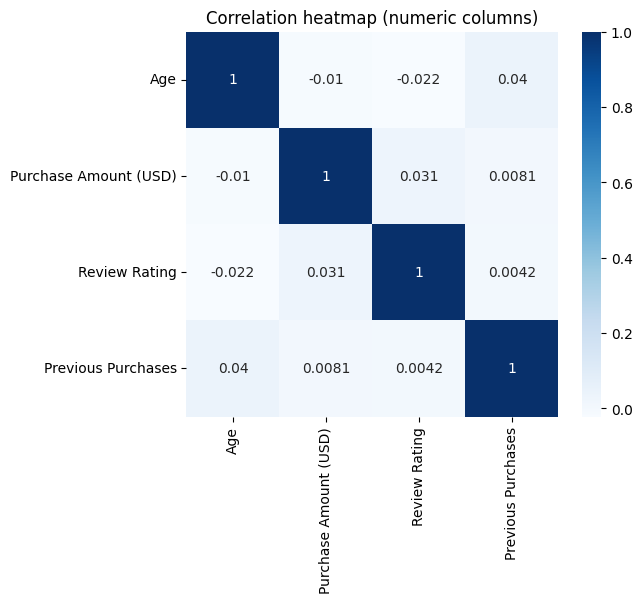

In [12]:
num = df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]].copy()
corr = num.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation heatmap (numeric columns)")
plt.show()


How to interpret the correlation heatmap

Correlation values range from -1 to +1.
- +1 means two variables move together perfectly (rare in real data).
- 0 means no linear relationship (there can still be a non-linear relationship).
- -1 means they move in opposite directions.

Practical reading
- Values around 0.1 to 0.3 are weak relationships.
- Values around 0.3 to 0.6 are moderate.
- Values above 0.6 are strong.

What this is useful for
- Quick hypothesis generation: for example, if previous purchases correlates with spend, loyalty may be linked to value.
- Feature selection hints: highly correlated features can be redundant.

What correlation does not prove
- Correlation is not causation. A third factor can drive both variables.
- A low correlation does not mean the variable is useless. Many relationships are non-linear or segment-specific.


13) Outlier check for purchase amount

What we do
We use the IQR method to flag unusually high or low values.
This does not automatically mean they are wrong, but it tells you where to investigate.

Why this matters
Outliers can:
- distort averages
- dominate model training
- signal special customer groups (VIP, bulk orders)
- signal data errors or fraud

You decide what to do based on business context.


In [13]:
q1 = df["Purchase Amount (USD)"].quantile(0.25)
q3 = df["Purchase Amount (USD)"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df["Purchase Amount (USD)"] < lower) | (df["Purchase Amount (USD)"] > upper)]
print("IQR bounds:", round(lower,2), "to", round(upper,2))
print("Outlier rows:", outliers.shape[0])
display(outliers.head(10))


IQR bounds: -24.0 to 144.0
Outlier rows: 0


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases


14) Customer level view (aggregating rows)

Why this matters
Business decisions often focus on customers, not rows.

What we do
We aggregate to customer level:
- spend
- rating
- previous purchases

Note
In this dataset, Customer ID appears to be unique per row, so customer level aggregation may match row level.
This cell confirms that.


In [14]:
print("Unique customers:", df["Customer ID"].nunique(), "Rows:", df.shape[0])

customer_summary = df.groupby("Customer ID").agg(
    total_spend=("Purchase Amount (USD)", "sum"),
    mean_rating=("Review Rating", "mean"),
    mean_prev_purchases=("Previous Purchases", "mean"),
    orders=("Customer ID", "count")
).sort_values("total_spend", ascending=False)

display(customer_summary.head(10))
print("Customers with 2+ rows:", int((customer_summary["orders"] >= 2).sum()))


Unique customers: 3900 Rows: 3900


,total_spend,mean_rating,mean_prev_purchases,orders
Customer ID,,,,
1480,100,4.0,2.0,1
1457,100,2.7,30.0,1
1592,100,2.9,24.0,1
2072,100,4.8,37.0,1
1422,100,3.0,24.0,1
1413,100,2.6,43.0,1
1406,100,2.7,39.0,1
1848,100,4.4,49.0,1
770,100,4.3,8.0,1


Customers with 2+ rows: 0


15) Cleaning: tidy text values and save cleaned data

What we do
- strip extra spaces from text columns
- save cleaned_shopping_data.csv

Why this matters
Small label inconsistencies break grouping and ML encoding.
Saving a cleaned file makes work reproducible and shareable.


In [15]:
df_clean = df.copy()

text_cols = df_clean.select_dtypes(include="object").columns
for col in text_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()

clean_path = "/content/cleaned_shopping_data.csv"
df_clean.to_csv(clean_path, index=False)
print("Saved cleaned dataset to:", clean_path)

df_clean.head()


Saved cleaned dataset to: /content/cleaned_shopping_data.csv


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


16) Feature engineering examples (optional but useful)

What is feature engineering
Creating helpful new columns from existing ones.

Why this matters
Better features often improve models more than switching to a more complex algorithm.

Examples
- subscriber_flag: 1 if subscribed
- discount_flag: 1 if discount applied
- spend_band: low, medium, high spend


In [16]:
df_feat = df_clean.copy()

df_feat["subscriber_flag"] = (df_feat["Subscription Status"].str.lower() == "yes").astype(int)
df_feat["discount_flag"] = (df_feat["Discount Applied"].str.lower() == "yes").astype(int)

df_feat["spend_band"] = pd.cut(
    df_feat["Purchase Amount (USD)"],
    bins=[-np.inf, 40, 70, np.inf],
    labels=["low", "medium", "high"]
)

display(df_feat[["Purchase Amount (USD)", "spend_band", "subscriber_flag", "discount_flag"]].head(10))


,Purchase Amount (USD),spend_band,subscriber_flag,discount_flag
0,53,medium,1,1
1,64,medium,1,1
2,73,high,1,1
3,90,high,1,1
4,49,medium,1,1
5,20,low,1,1
6,85,high,1,1
7,34,low,1,1
8,97,high,1,1
9,31,low,1,1


17) Prepare data for ML with a pipeline (recommended way)

Why pipelines matter
A pipeline packages preprocessing and modelling together so you:
- avoid data leakage
- avoid forgetting a preprocessing step at inference time
- can reuse and deploy more easily

We will:
- split features (X) and target (y)
- use ColumnTransformer for one hot encoding and scaling


In [17]:
target_reg = "Purchase Amount (USD)"

X = df_feat.drop(columns=[target_reg])
y = df_feat[target_reg]

categorical_features = X.select_dtypes(include="object").columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical features:", categorical_features)
print("Numeric features:", numeric_features)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)


Categorical features: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Discount Applied', 'Payment Method', 'Frequency of Purchases']
Numeric features: ['Customer ID', 'Age', 'Review Rating', 'Previous Purchases', 'subscriber_flag', 'discount_flag']


18) Regression: baseline models to predict purchase amount

We will train three regressors:
- Linear Regression: simple and interpretable baseline
- Random Forest Regressor: strong non-linear baseline for tabular data
- MLP Regressor: a simple neural network baseline (deep learning style)

How to interpret results
- MAE: average absolute error in dollars (easy to explain)
- RMSE: typical error size, penalises large errors more
- R2: explained variance (closer to 1 is better)

Business interpretation
Ask: is the typical error small enough to support a decision?
Example decisions:
- flag likely high spend orders
- estimate expected basket value for planning


In [18]:
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def eval_reg(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(name)
    print("  MAE :", round(mae, 2))
    print("  RMSE:", round(rmse, 2))
    print("  R2  :", round(r2, 3))

# Linear regression pipeline
reg_lr = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LinearRegression())
])
reg_lr.fit(X_train, y_train)
pred_lr = reg_lr.predict(X_test)
eval_reg(y_test, pred_lr, "Linear Regression")

# Random forest regression pipeline
reg_rf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])
reg_rf.fit(X_train, y_train)
pred_rf = reg_rf.predict(X_test)
eval_reg(y_test, pred_rf, "Random Forest Regressor")

# MLP regression pipeline
reg_mlp = Pipeline(steps=[
    ("prep", preprocess),
    ("model", MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        max_iter=400,
        random_state=42
    ))
])
reg_mlp.fit(X_train, y_train)
pred_mlp = reg_mlp.predict(X_test)
eval_reg(y_test, pred_mlp, "MLP Regressor")


Linear Regression
  MAE : 20.89
  RMSE: 24.01
  R2  : -0.03
Random Forest Regressor
  MAE : 21.0
  RMSE: 24.12
  R2  : -0.039
MLP Regressor
  MAE : 27.41
  RMSE: 33.98
  R2  : -1.064


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


How to interpret the regression results (predicting spend)

You will see MAE, RMSE, and R2.

MAE (mean absolute error)
- Average absolute mistake size in dollars.
- Easy to explain to stakeholders: "on average we are off by about X dollars".

RMSE (root mean squared error)
- Like MAE, but it penalises big mistakes more strongly.
- If RMSE is much larger than MAE, it suggests some large errors (often due to outliers or missing drivers).

R2 score
- How much of the variation in spend the model explains.
- R2 near 0 means the model is not explaining spend well with current features.
- R2 near 1 means strong predictive signal (rare in many business datasets).

How to judge if the model is useful
- Compare MAE or RMSE to typical order value.
  - If average spend is 60 and MAE is 5, that is often useful.
  - If average spend is 60 and MAE is 25, the predictions may not be actionable.
- Compare to a simple baseline. A simple baseline is predicting the average spend for everyone.

What to do if performance is weak
- Add features that explain behaviour: time, channel, campaigns, basket size, product price, tenure, recency, frequency, monetary (RFM).
- Consider segment-specific models (separate by category or subscription status).
- Try different targets: predict spend band (low/medium/high) instead of exact dollars.


19) Regression residuals (where the model is wrong)

Residual = actual - predicted

Why this matters
Residual plots show:
- systematic bias (always underpredicting high spend)
- whether errors get worse for certain ranges

This helps decide if:
- you need better features
- you need a different model
- you should change the business decision to a simpler target (for example, high vs low spend)


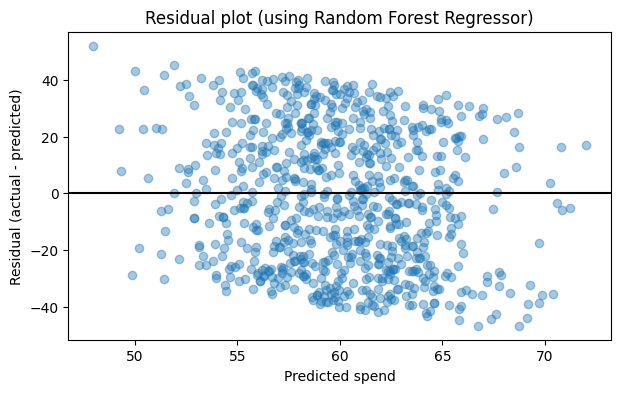

In [19]:
pred = pred_rf  # choose which model's predictions to inspect
residuals = y_test - pred

plt.figure(figsize=(7,4))
plt.scatter(pred, residuals, alpha=0.4)
plt.axhline(0, color="black")
plt.title("Residual plot (using Random Forest Regressor)")
plt.xlabel("Predicted spend")
plt.ylabel("Residual (actual - predicted)")
plt.show()


How to interpret the residual plot

Residual = actual spend - predicted spend.

What a healthy residual plot looks like
- Points scattered around zero with no clear pattern.

Warning patterns and what they mean
- Curve pattern: the model is missing a non-linear relationship (try non-linear models or better features).
- Funnel shape (errors widen as predictions increase): the model struggles more on high spend customers (consider log transform of spend, or segment high spenders).
- Many large residuals: outliers or missing drivers (campaigns, bulk buys, VIPs).

Business interpretation
- If the model underpredicts high spenders, you risk undervaluing high-value customers.
- If errors spike around certain spend ranges, create spend bands and model each band or segment.


20) Regression cross-validation (more reliable evaluation)

Why this matters
A single train/test split can be unlucky. Cross-validation repeats training on multiple splits to give a more stable view.

We will compute cross-validated R2 for the random forest regressor pipeline.


In [20]:
scores = cross_val_score(reg_rf, X, y, cv=5, scoring="r2")
print("Cross-validated R2 scores:", np.round(scores, 3))
print("Mean R2:", round(scores.mean(), 3), "Std:", round(scores.std(), 3))


Cross-validated R2 scores: [-0.049 -0.045 -0.025 -0.029 -0.035]
Mean R2: -0.037 Std: 0.009


How to interpret cross-validation output

Cross-validation repeats training and testing across several splits of the data.
You will see a list of R2 scores plus a mean and a standard deviation.

- Mean R2: typical performance you can expect on similar data.
- Standard deviation: stability across splits.
  - Small std means performance is consistent.
  - Large std means results depend heavily on which rows ended up in the test set.

What to do if the scores vary a lot
- Use more data if possible.
- Ensure classes or key segments are represented in each split.
- Reduce leakage risk: do not let customer identifiers or target-derived fields sneak into features.


21) Classification: predict Category

Why this matters
Classification supports:
- recommendation routing
- intent prediction
- product mix planning by segment

We will train:
- Logistic Regression baseline (fast, interpretable)
- Random Forest baseline (strong tabular baseline)
- MLP classifier (neural network baseline)

We will evaluate with:
- accuracy
- classification report (precision, recall, F1)
- confusion matrix (what gets confused with what)


In [21]:
target_clf = "Category"

Xc = df_feat.drop(columns=[target_clf])
yc = df_feat[target_clf]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42, stratify=yc
)

# Preprocess is already defined from earlier, but ensure correct columns
cat_features_c = Xc.select_dtypes(include="object").columns.tolist()
num_features_c = Xc.select_dtypes(include=[np.number]).columns.tolist()

preprocess_c = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features_c),
        ("num", StandardScaler(), num_features_c)
    ]
)


In [22]:
# Logistic regression
clf_lr = Pipeline(steps=[
    ("prep", preprocess_c),
    ("model", LogisticRegression(max_iter=1000))
])
clf_lr.fit(Xc_train, yc_train)
pred_lr_c = clf_lr.predict(Xc_test)

print("Logistic Regression accuracy:", round(accuracy_score(yc_test, pred_lr_c), 3))
print(classification_report(yc_test, pred_lr_c))

# Random forest
clf_rf = Pipeline(steps=[
    ("prep", preprocess_c),
    ("model", RandomForestClassifier(n_estimators=400, random_state=42))
])
clf_rf.fit(Xc_train, yc_train)
pred_rf_c = clf_rf.predict(Xc_test)

print("Random Forest accuracy:", round(accuracy_score(yc_test, pred_rf_c), 3))
print(classification_report(yc_test, pred_rf_c))


Logistic Regression accuracy: 1.0
              precision    recall  f1-score   support

 Accessories       1.00      1.00      1.00       248
    Clothing       1.00      1.00      1.00       347
    Footwear       1.00      1.00      1.00       120
   Outerwear       1.00      1.00      1.00        65

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

Random Forest accuracy: 1.0
              precision    recall  f1-score   support

 Accessories       1.00      1.00      1.00       248
    Clothing       1.00      1.00      1.00       347
    Footwear       1.00      1.00      1.00       120
   Outerwear       1.00      1.00      1.00        65

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



How to interpret the classification report

For each category, you will see precision, recall, and f1-score.

Precision
- Of the rows predicted as this category, how many were correct?
- High precision means fewer false alarms for that category.

Recall
- Of the rows that truly belong to this category, how many did the model find?
- High recall means fewer missed cases for that category.

F1-score
- Balanced summary of precision and recall.

Why this matters in business
- Different use cases want different trade-offs.
  - Recommendation: precision matters (avoid showing irrelevant items).
  - Risk or compliance: recall may matter more (avoid missing true cases).

If overall accuracy looks fine but some categories are poor
- Accuracy can hide weak performance on smaller categories.
- Look at per-category recall and f1-score to find where the model fails.


22) Confusion matrix and how to read it

What a confusion matrix shows
- Rows are the true categories.
- Columns are the predicted categories.
- The diagonal cells are correct predictions.
- Off-diagonal cells are mistakes.

How to read it quickly
1) Look at the diagonal. Bigger numbers on the diagonal mean the model is doing well for those categories.
2) Look for big off-diagonal cells. These tell you which categories the model confuses.
   Example: if "Clothing" is often predicted as "Accessories", those two may look similar in your features.

Why accuracy alone is not enough
- If one category is very common, a model can get high accuracy while performing badly on rare categories.
- The confusion matrix shows where the mistakes happen, not just how many.

Normalised view
Raw counts are useful, but percentages are often easier to compare across categories.
A normalised confusion matrix shows, for each true category, the percentage that went to each predicted category.

Business action from confusion patterns
- If two categories are frequently confused, you can:
  - add new features that separate them (brand, price, channel, product attributes)
  - collect more data for the weaker category
  - simplify the label set (merge categories) if the business does not need that granularity
  - change the objective: predict higher-level category first, then subcategory


<Figure size 1200x1200 with 0 Axes>

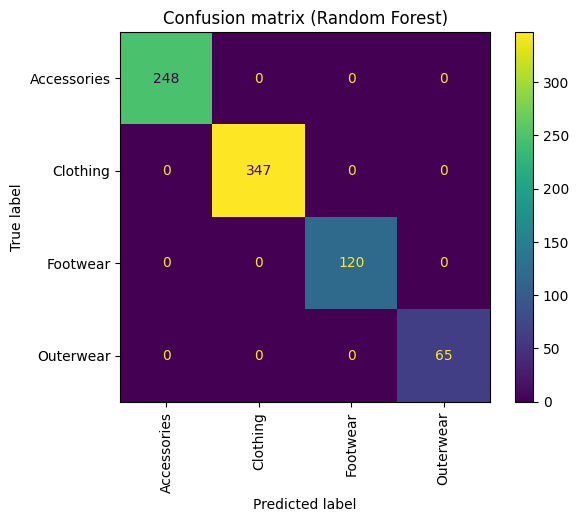

In [23]:
labels = sorted(df_feat["Category"].unique().tolist())

cm = confusion_matrix(yc_test, pred_rf_c, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(12,12))
disp.plot(xticks_rotation=90, values_format="d")
plt.title("Confusion matrix (Random Forest)")
plt.show()


What to do next with the confusion matrix

Step 1: Identify the top confusions
- Pick 2 to 5 of the largest off-diagonal cells.
- Ask: do these categories overlap in real life, or is it a data issue?

Step 2: Decide whether the error is acceptable
- If the model is used for internal analytics, some confusion may be fine.
- If it drives user-facing recommendations, you may want higher precision.
- If it drives operational routing, you may prioritise recall.

Step 3: Improve with targeted changes
- Feature improvements usually beat model complexity.
  - Add recency/frequency features, channel, campaign exposure, basket size, product price.
- Handle imbalance:
  - use class_weight="balanced" for some models
  - collect more samples for rare categories
- Evaluate with macro average f1-score if you care about minority categories.


23) How to improve classification accuracy (practical checklist)

1) Better features
- include more behavioural history (dates, baskets, channels)
- add derived features (spend bands, discount flag, subscriber flag, interactions)

2) Better evaluation
- use cross-validation
- look at macro F1 (treats all classes more equally)

3) Handle class imbalance
- class_weight in models
- resampling (careful)

4) Model tuning
- tune hyperparameters with GridSearchCV
- try gradient boosting (often strong for tabular)

5) Label quality
- check if categories are consistent and meaningful
- merge categories if business taxonomy is too granular

Next cell shows a small hyperparameter tuning example for Random Forest.


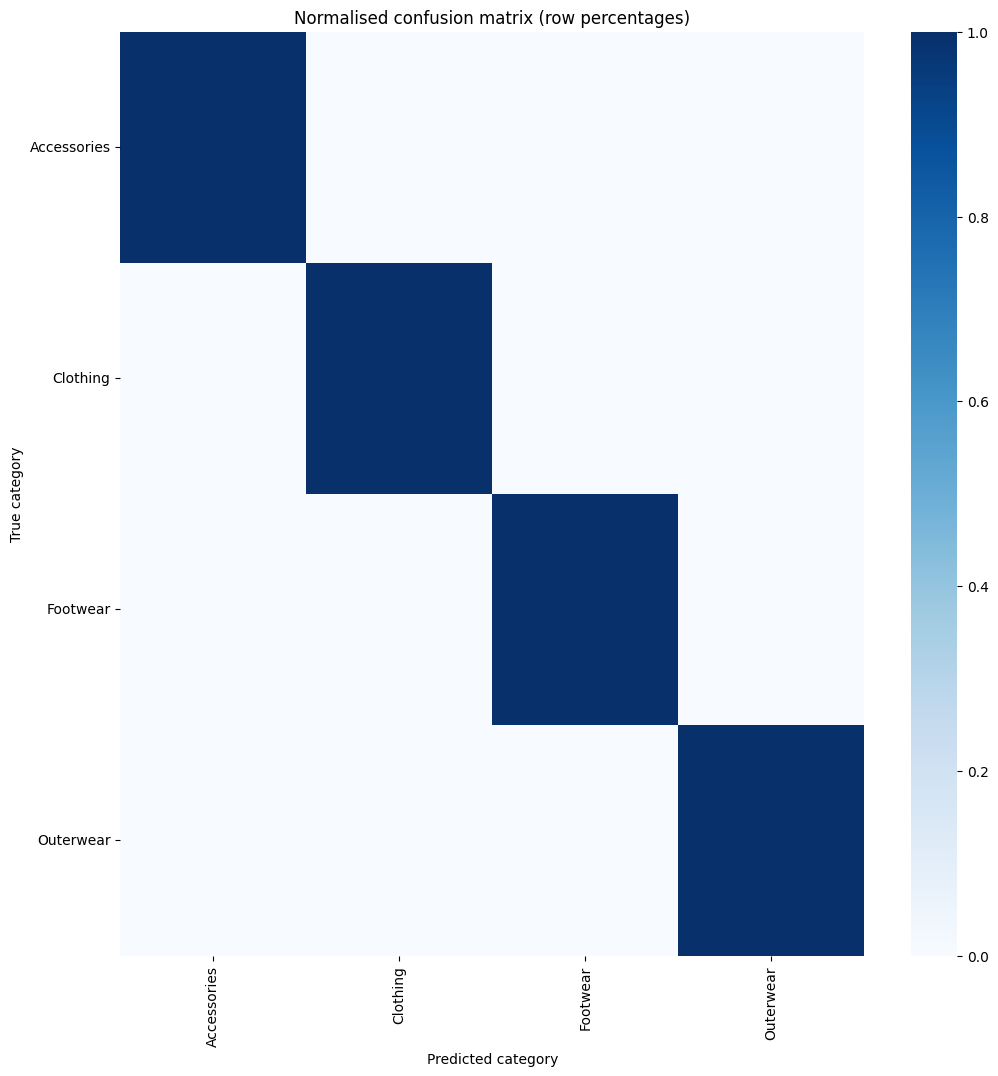

In [24]:
# Optional: normalised confusion matrix (percentages by true category)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(12,12))
sns.heatmap(cm_norm, xticklabels=labels, yticklabels=labels, cmap="Blues", annot=False)
plt.title("Normalised confusion matrix (row percentages)")
plt.xlabel("Predicted category")
plt.ylabel("True category")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [25]:
param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 10],
}

tune_rf = Pipeline(steps=[
    ("prep", preprocess_c),
    ("model", RandomForestClassifier(random_state=42))
])

grid = GridSearchCV(tune_rf, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(Xc_train, yc_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", round(grid.best_score_, 3))

best_model = grid.best_estimator_
pred_best = best_model.predict(Xc_test)
print("Test accuracy:", round(accuracy_score(yc_test, pred_best), 3))


Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV accuracy: 1.0
Test accuracy: 1.0


24) MLP classifier (neural network baseline for tabular data)

What an MLP is
A multi-layer perceptron is a basic neural network.
It can learn non-linear relationships like tree models, but often needs:
- scaling
- tuning
- enough data

Why include it
Many teams ask about deep learning. This shows:
- how to train a simple neural model on tabular data
- how it compares to classical baselines


In [26]:
clf_mlp = Pipeline(steps=[
    ("prep", preprocess_c),
    ("model", MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        max_iter=400,
        random_state=42
    ))
])

clf_mlp.fit(Xc_train, yc_train)
pred_mlp_c = clf_mlp.predict(Xc_test)

print("MLP accuracy:", round(accuracy_score(yc_test, pred_mlp_c), 3))
print(classification_report(yc_test, pred_mlp_c))


MLP accuracy: 1.0
              precision    recall  f1-score   support

 Accessories       1.00      1.00      1.00       248
    Clothing       1.00      1.00      1.00       347
    Footwear       1.00      1.00      1.00       120
   Outerwear       1.00      1.00      1.00        65

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



Interpreting the MLP classifier result

If the MLP accuracy is better than Random Forest
- It suggests there is a pattern that benefits from a neural network.
- Confirm with cross-validation to ensure it is not luck.

If the MLP accuracy is worse
- That is common on smaller tabular datasets.
- MLPs usually need careful tuning (layers, learning rate, regularisation) and more data.

Practical takeaway
Use MLP as a baseline for "neural networks on tables".
In many business tabular tasks, tree-based models (Random Forest, Gradient Boosting) are strong and easier to maintain.


25) Segmentation: clustering customers

Why clustering is useful
Segmentation can be actionable even when prediction is hard.
You can create customer groups and tailor:
- messaging
- offers
- service level
- retention strategy

We cluster using numeric features:
Age, Purchase Amount, Previous Purchases, Review Rating

We scale features first so no single feature dominates.


In [27]:
cluster_features = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Review Rating"]
X_cluster = df_feat[cluster_features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Choose k (start with 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

df_clusters = df_feat.copy()
df_clusters["Cluster"] = kmeans.fit_predict(X_scaled)

print("Cluster sizes:")
display(df_clusters["Cluster"].value_counts().sort_index())

print("\nCluster profiles (mean values):")
display(df_clusters.groupby("Cluster")[cluster_features].mean())


Cluster sizes:


,count
Cluster,
0,966
1,969
2,986
3,979



Cluster profiles (mean values):


,Age,Purchase Amount (USD),Previous Purchases,Review Rating
Cluster,,,,
0,56.218427,82.076605,26.759834,3.963768
1,31.328173,54.860681,24.984520,4.426316
2,32.585193,64.758621,22.440162,3.088540
3,56.255363,37.572012,27.257406,3.535649


How to interpret clusters

The cluster summary table shows the average values for each cluster.
Use it to create simple segment descriptions.

A practical way to name segments
- High spend, high previous purchases: loyal high value
- Low spend, low previous purchases: new or low value
- High rating, medium spend: satisfied steady buyers
- Any cluster with extreme values: potential VIPs or special cases

How to use clusters in business
- Tailor messages, offers, or service level per segment.
- Track KPIs by segment over time (retention, revenue, churn, satisfaction).

Important cautions
- KMeans will always produce k clusters even if the data does not naturally separate.
- Clusters are not ground truth. Validate them by checking whether actions differ by cluster.


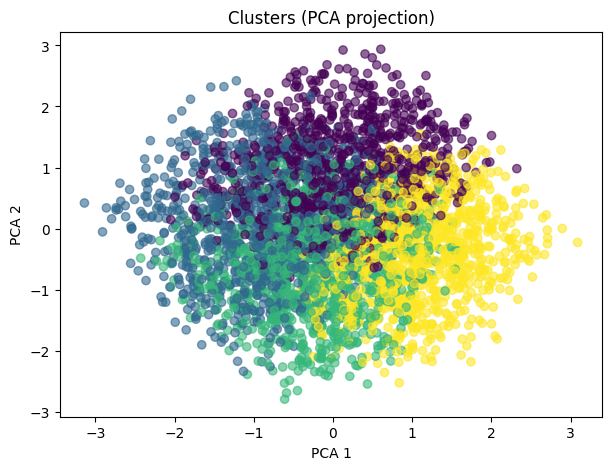

In [28]:
# 2D view using PCA for visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_clusters["Cluster"], alpha=0.6)
plt.title("Clusters (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


How to interpret the PCA cluster plot

This plot is a 2D picture of multi-dimensional data.
PCA compresses the original features into two components so we can visualise.

How to use it
- If clusters appear separated, the segmentation is likely meaningful.
- If clusters overlap heavily, segments may be weak or features may not separate customers well.

Caution
- The plot is only a visual aid. Decisions should be based on the cluster profiles and business outcomes, not only the picture.


In [29]:
clustered_path = "/content/clustered_customer_data.csv"
df_clusters.to_csv(clustered_path, index=False)
print("Saved clustered dataset to:", clustered_path)


Saved clustered dataset to: /content/clustered_customer_data.csv


26) Association rules (product affinity) and why it may not work here

What association rules do
They find patterns like:
If people buy A, they often also buy B.

What you need for meaningful rules
You need baskets or repeat purchases, for example:
- each customer has multiple items per order, or
- each customer has multiple orders over time

Check suitability
The next cell checks how many customers have 2+ purchases in this file.
If it is near zero, rules will not be meaningful.

We include a small synthetic basket demo so you can still learn the method.


In [30]:
counts = df_clean["Customer ID"].value_counts()
print("Customers total:", df_clean["Customer ID"].nunique())
print("Max rows for one customer:", counts.max())
print("Customers with 2+ rows:", int((counts >= 2).sum()))


Customers total: 3900
Max rows for one customer: 1
Customers with 2+ rows: 0


Association rules demo (synthetic baskets). This teaches the technique even if the main dataset is not suitable.


In [31]:
from mlxtend.frequent_patterns import apriori, association_rules

demo = pd.DataFrame([
    {"Bread":1, "Milk":1, "Eggs":0, "Butter":1},
    {"Bread":1, "Milk":1, "Eggs":1, "Butter":0},
    {"Bread":0, "Milk":1, "Eggs":1, "Butter":1},
    {"Bread":1, "Milk":0, "Eggs":0, "Butter":1},
    {"Bread":1, "Milk":1, "Eggs":0, "Butter":0},
])

freq = apriori(demo, min_support=0.4, use_colnames=True)
rules = association_rules(freq, metric="lift", min_threshold=1.0).sort_values("lift", ascending=False)

print("Frequent itemsets:")
display(freq)

print("\nTop rules:")
display(rules[["antecedents","consequents","support","confidence","lift"]].head(10))


Frequent itemsets:


/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
0,0.8,(Bread)
1,0.8,(Milk)
2,0.4,(Eggs)
3,0.6,(Butter)
4,0.6,"(Milk, Bread)"
5,0.4,"(Butter, Bread)"
6,0.4,"(Milk, Eggs)"
7,0.4,"(Milk, Butter)"



Top rules:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,support,confidence,lift
0,(Milk),(Eggs),0.4,0.5,1.25
1,(Eggs),(Milk),0.4,1.0,1.25


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

27) Forecasting next month orders (what you need, and an LSTM example)

Key point
This dataset has no date column. Forecasting requires a time series.
To forecast next month orders by category or gender, you need at least:
- an order date (or timestamp)
- repeated history across many weeks or months
- ideally an order id and quantity

What to do in a real business project
1) Ensure your systems capture order_date for each transaction.
2) Aggregate to monthly counts by group (for example, Category and Gender).
3) Choose a baseline forecasting method.
4) Evaluate on a holdout period (backtesting).
5) Deploy and monitor.

We will do two things here:
A) show the code structure you would use if you had a date column
B) run a small synthetic time series demo to show how an LSTM works

A) If you have a dataset with a date column called Order Date, you can adapt this template.


In [32]:
# Template only: run this on a dataset that has a date column.
# It will not work on the current dataset because there is no date.

# df_time = pd.read_csv(file_path)
# df_time["Order Date"] = pd.to_datetime(df_time["Order Date"])
# df_time["month"] = df_time["Order Date"].dt.to_period("M").dt.to_timestamp()

# monthly = df_time.groupby(["month", "Category", "Gender"]).size().reset_index(name="orders")
# display(monthly.head())


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

B) LSTM forecasting demo (synthetic monthly orders)

Why an LSTM
An LSTM is designed for sequences (ordered data over time).
It can learn patterns like trend and seasonality when you have enough history.

This demo creates a simple time series with a seasonal pattern, then trains an LSTM to predict the next value.
In real work, replace the synthetic series with your aggregated monthly orders.


In [33]:
# Install TensorFlow (usually already available in Colab, but this ensures it)
!pip -q install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

print("TensorFlow version:", tf.__version__)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

TensorFlow version: 2.19.0


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

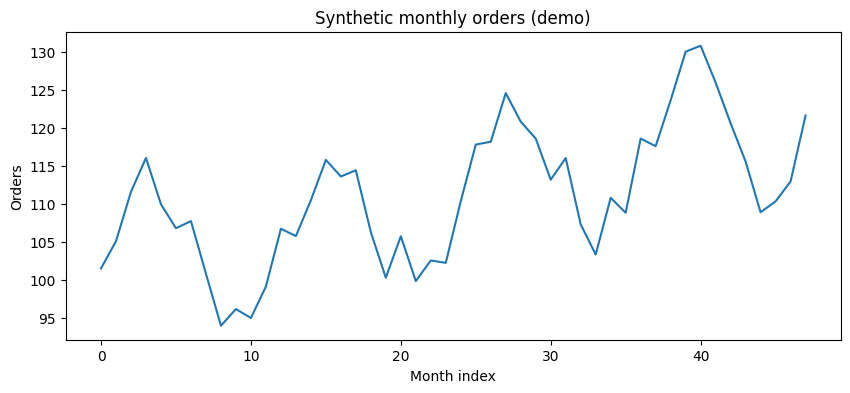

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [34]:
# Create a synthetic monthly order series with seasonality
np.random.seed(42)
months = 48  # 4 years of monthly data
t = np.arange(months)

series = 100 + 10*np.sin(2*np.pi*t/12) + 0.5*t + np.random.normal(0, 3, size=months)
series = series.astype(np.float32)

plt.figure(figsize=(10,4))
plt.plot(series)
plt.title("Synthetic monthly orders (demo)")
plt.xlabel("Month index")
plt.ylabel("Orders")
plt.show()


In [35]:
# Turn the series into supervised learning sequences
def make_sequences(arr, window=12):
    Xs, ys = [], []
    for i in range(len(arr) - window):
        Xs.append(arr[i:i+window])
        ys.append(arr[i+window])
    Xs = np.array(Xs)[..., None]  # shape: (samples, window, 1)
    ys = np.array(ys)
    return Xs, ys

window = 12
X_seq, y_seq = make_sequences(series, window=window)

# Train/test split
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])


Train samples: 28 Test samples: 8


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

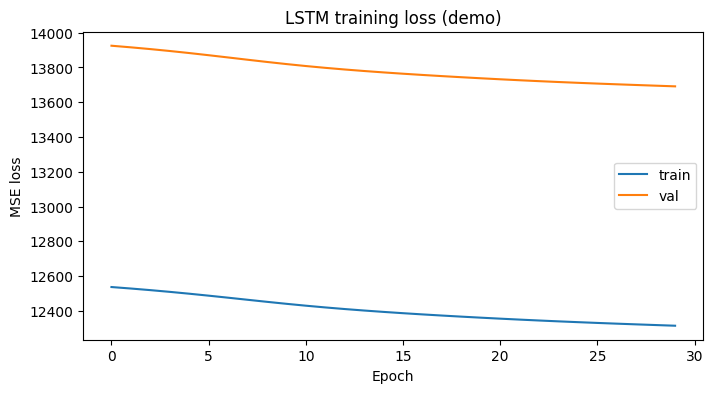

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [36]:
# Simple LSTM model
model = models.Sequential([
    layers.Input(shape=(window, 1)),
    layers.LSTM(32),
    layers.Dense(1)
])

model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, verbose=0)

plt.figure(figsize=(8,4))
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("LSTM training loss (demo)")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

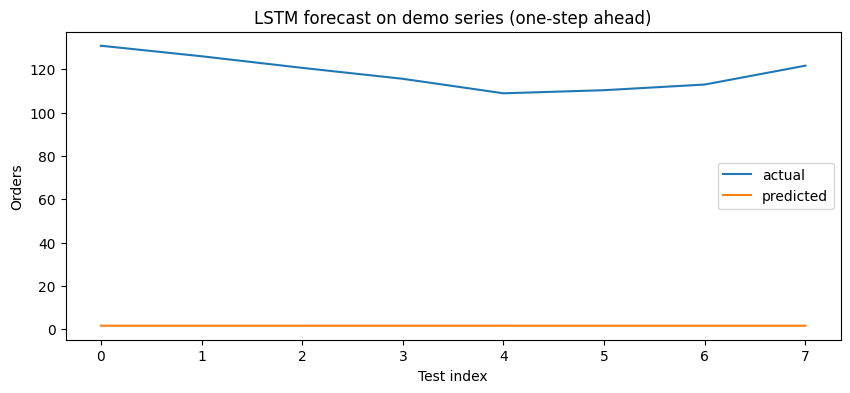

Demo RMSE: 117.01


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [37]:
pred = model.predict(X_test).flatten()

plt.figure(figsize=(10,4))
plt.plot(y_test, label="actual")
plt.plot(pred, label="predicted")
plt.title("LSTM forecast on demo series (one-step ahead)")
plt.xlabel("Test index")
plt.ylabel("Orders")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("Demo RMSE:", round(float(rmse), 2))


28) Export outputs

Why this matters
A workshop becomes useful when participants can take artefacts away:
- cleaned data
- encoded data (if you choose to create it)
- clustered data
- saved models
- simple report

You can download files directly from Colab.


In [38]:
# Save an encoded dataset (simple one hot encoding) for sharing
categorical_cols = df_clean.select_dtypes(include="object").columns.tolist()
df_encoded_simple = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

encoded_path = "/content/encoded_shopping_data.csv"
df_encoded_simple.to_csv(encoded_path, index=False)
print("Saved encoded dataset to:", encoded_path)

# Save best tuned classification model (optional)
# joblib.dump(best_model, "/content/best_category_model.pkl")

from google.colab import files
files.download(clean_path)
files.download(encoded_path)
files.download(clustered_path)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Saved encoded dataset to: /content/encoded_shopping_data.csv


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag